In [1]:
# If any of the cells are hidden please click on them to view them
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
import timeit

# Section 1: Data Cleaning

### Data Overview

In [2]:
# Reading the csv file into a dataframe and checking it's shape 
df = pd.read_csv('Invistico_Airline.csv')
print(df.shape)

(129880, 23)


In [3]:
# Printing out the details of the dataframe 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [4]:
# Finding out how many null values there are in the data 
print(df.isnull().sum())

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64


### Feature Correlations

In [5]:
# We can see that only the column 'Arrival Delay in Minutes' has 393 null values
# One possible approach will be to delete these 393 rows
# But that would mean loss of data which is undesirable
# So, before we delete the rows let us find out the correlation between the features of the data

#Finding out and displaying the absolute correlation between the different features of the data
abs_corr_features = df.corr().abs()

rearrange = (abs_corr_features.where(np.triu(np.ones(abs_corr_features.shape), k=1)
                                     .astype(np.bool)).stack().sort_values(ascending=False))

print(rearrange)

Departure Delay in Minutes         Arrival Delay in Minutes    0.965291
Seat comfort                       Food and drink              0.715997
Ease of Online booking             Online boarding             0.684320
Online support                     Online boarding             0.669843
Baggage handling                   Cleanliness                 0.631803
                                                                 ...   
Age                                Gate location               0.000547
Departure/Arrival time convenient  Online support              0.000546
Leg room service                   Arrival Delay in Minutes    0.000472
Gate location                      Baggage handling            0.000401
                                   Inflight entertainment      0.000280
Length: 153, dtype: float64


### Dropping Column

In [6]:
# From the above calculations we can see that 
# 'Arrival Delay in Minutes' and 'Departure Delay in Minutes' are 96.5% correlated
# This refers to the fact that only one of these features are contributing new information to the data
# This allows us to remove one of the columns which are correlated
# Earlier we found that the column 'Arrival Delay in Minutes' has some null values
# So we can remove 'Arrival Delay in Minutes' without losing any tuples from our data
# and also by preserving all the information

# Removing the column 'Arrival Delay in Minutes'
df.drop('Arrival Delay in Minutes', axis=1, inplace=True)

In [7]:
# Checking the information about the data after removal of column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   satisfaction                       129880 non-null  object
 1   Gender                             129880 non-null  object
 2   Customer Type                      129880 non-null  object
 3   Age                                129880 non-null  int64 
 4   Type of Travel                     129880 non-null  object
 5   Class                              129880 non-null  object
 6   Flight Distance                    129880 non-null  int64 
 7   Seat comfort                       129880 non-null  int64 
 8   Departure/Arrival time convenient  129880 non-null  int64 
 9   Food and drink                     129880 non-null  int64 
 10  Gate location                      129880 non-null  int64 
 11  Inflight wifi service              129880 non-null  

In [8]:
# Verifying that there are no more null values in the data
print(df.isnull().sum())

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
dtype: int64


In [9]:
# Displaying some values of our dataset
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,4,2,3,3,0,3,5,3,2,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,2,3,4,4,4,2,3,2,310
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,0,2,2,3,3,4,4,4,2,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,4,3,1,1,0,1,4,1,3,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,3,4,2,2,0,2,4,2,5,0


### Separating Categorical and Numerical Columns

In [10]:
# Seperating the categorical columns from the data set 
df_categorical = df.select_dtypes(exclude=['number', 'bool_', 'float_'])
df_categorical.head()

,satisfaction,Gender,Customer Type,Type of Travel,Class
0,satisfied,Female,Loyal Customer,Personal Travel,Eco
1,satisfied,Male,Loyal Customer,Personal Travel,Business
2,satisfied,Female,Loyal Customer,Personal Travel,Eco
3,satisfied,Female,Loyal Customer,Personal Travel,Eco
4,satisfied,Female,Loyal Customer,Personal Travel,Eco


In [11]:
# Separating the numerical columns from the dataset 
df_numerical = df.select_dtypes(exclude=['object'])
df_numerical.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0
1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310
2,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0
3,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0
4,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0


### Plotting Data Distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AB18712648>,
      dtype=object)

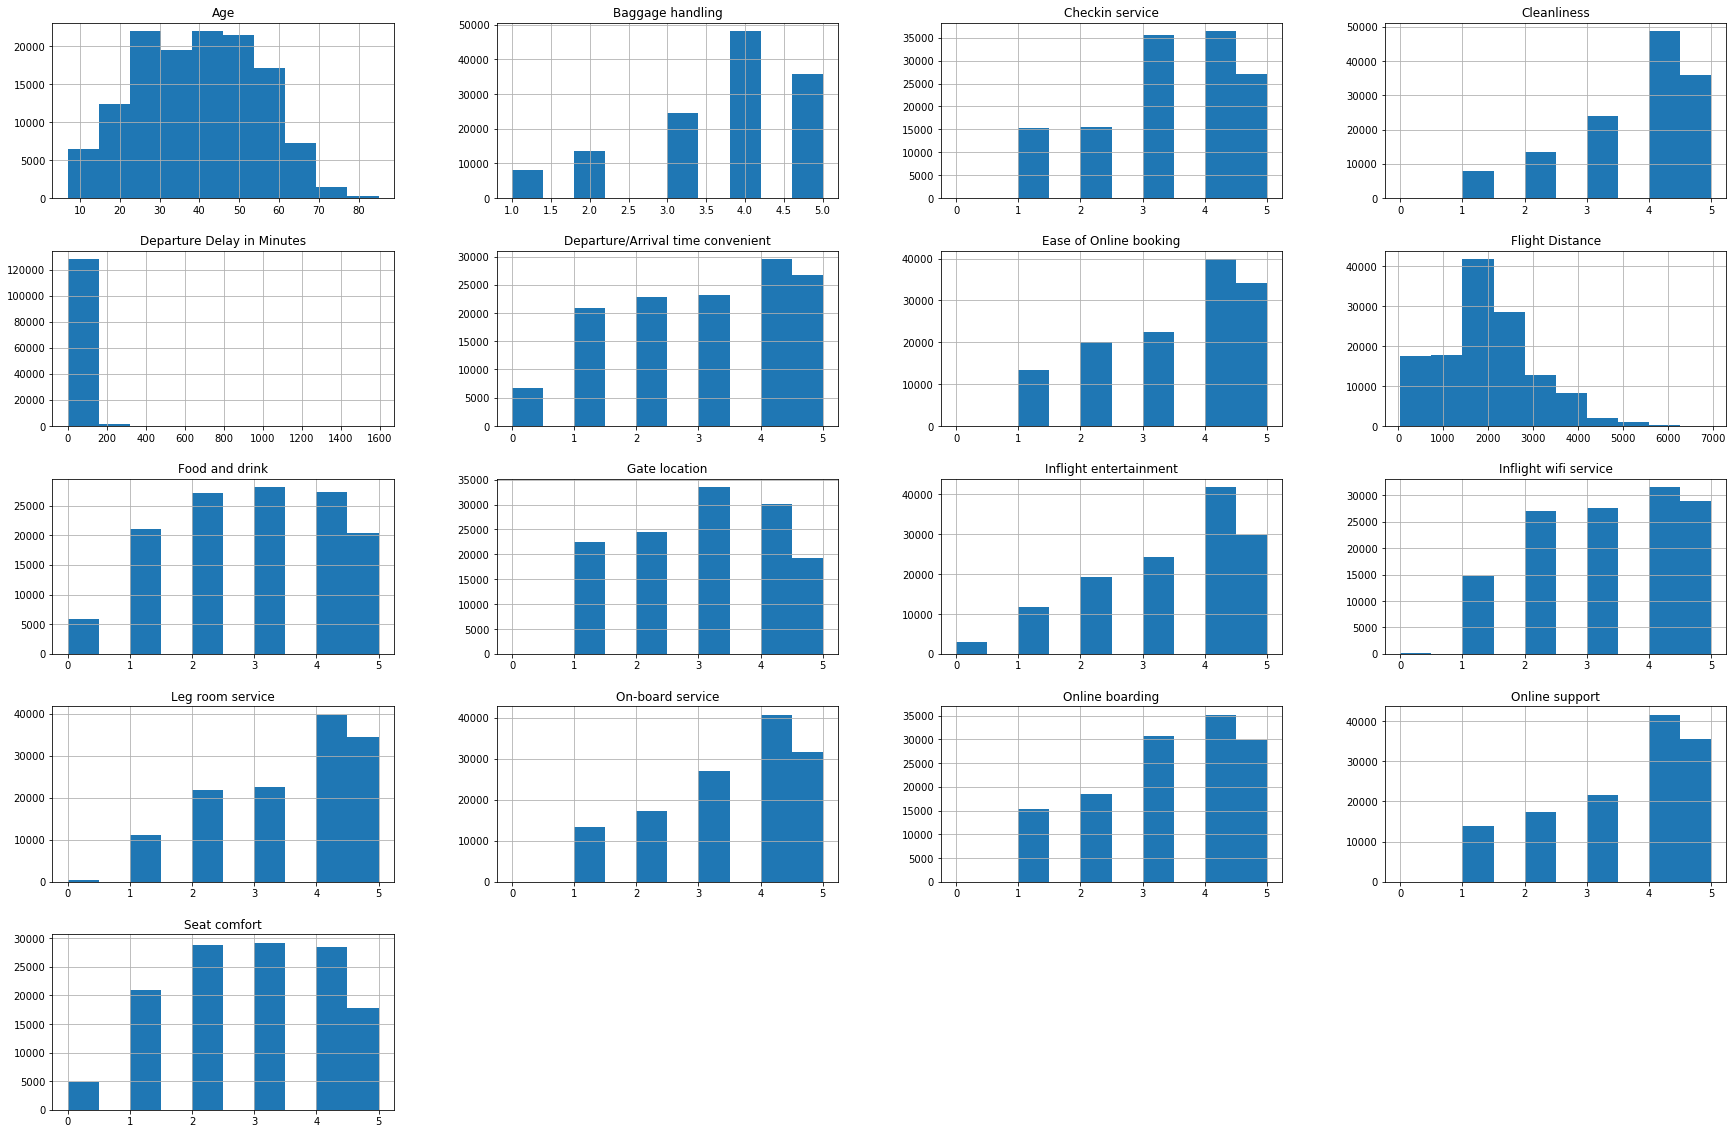

In [12]:
# Plotting the histogram of the numerical features to check on their distributions 
df.hist(figsize=(30, 20))

<ul>
    <li> We can see that the distribution of the features is very skewed. </li>
    <li> A skewed distribution of the features will create a biased model. </li>
    <li> We will fix the distributions of the features later on. </li>

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


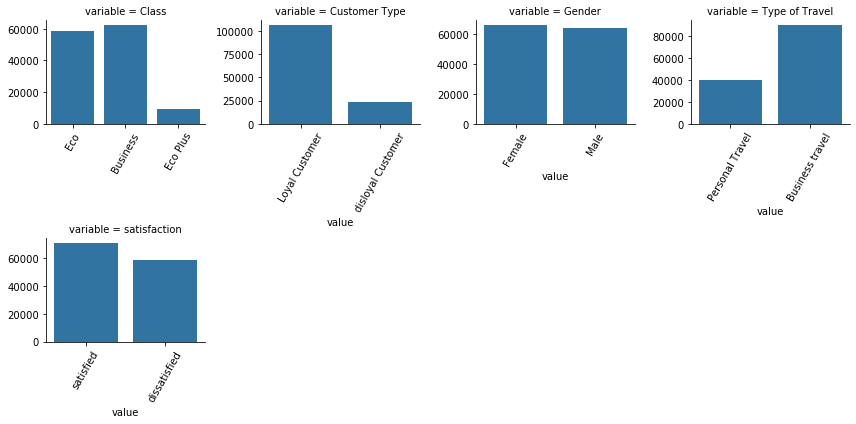

In [14]:
# Displaying the distributions of the categorical features
f = pd.melt(df, value_vars=sorted(df_categorical))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [15]:
# Finding out the percentage of people who are dissatisfied with the service of the airline 
is_dissatisfied = df['satisfaction']=='dissatisfied'
y_dissatisfied = df.satisfaction[is_dissatisfied]

print('Percentage of dissatisfied people: ', str((y_dissatisfied.shape[0]/df['satisfaction'].shape[0]) * 100))

Percentage of dissatisfied people:  45.26716969510317


<ul>
<li> We can assert from this that our dataset is not skewed and therefore can be said to be almost balanced. </li> 
</ul>

### Encoding Categorical Columns into Numerical Values

In [17]:
# Encoding the categorical values to have numerical values
label_encoder = preprocessing.LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])
df['Customer Type'] = label_encoder.fit_transform(df['Customer Type'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Type of Travel'] = label_encoder.fit_transform(df['Type of Travel'])

# Verifying the data types of the features
print(df.dtypes)

satisfaction                         object
Gender                                int32
Customer Type                         int32
Age                                   int64
Type of Travel                        int32
Class                                 int32
Flight Distance                       int64
Seat comfort                          int64
Departure/Arrival time convenient     int64
Food and drink                        int64
Gate location                         int64
Inflight wifi service                 int64
Inflight entertainment                int64
Online support                        int64
Ease of Online booking                int64
On-board service                      int64
Leg room service                      int64
Baggage handling                      int64
Checkin service                       int64
Cleanliness                           int64
Online boarding                       int64
Departure Delay in Minutes            int64
dtype: object


In [18]:
# Checking the current state of our dataframe 
print(df.shape)
df.head()

(129880, 22)


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
0,satisfied,0,0,65,1,1,265,0,0,0,...,4,2,3,3,0,3,5,3,2,0
1,satisfied,1,0,47,1,0,2464,0,0,0,...,2,2,3,4,4,4,2,3,2,310
2,satisfied,0,0,15,1,1,2138,0,0,0,...,0,2,2,3,3,4,4,4,2,0
3,satisfied,0,0,60,1,1,623,0,0,0,...,4,3,1,1,0,1,4,1,3,0
4,satisfied,0,0,70,1,1,354,0,0,0,...,3,4,2,2,0,2,4,2,5,0


### Separating X and y Variables

In [19]:
# Separating the y variable 
y = df['satisfaction']
print(y.size)

129880


In [20]:
# Encoding the y variable with binary values
y = y.replace({'satisfied': 1, 'dissatisfied': 0})
# Converting the dataframe to a numpy array for further calculations
y = y.to_numpy()

In [21]:
# Creating the X (data) matrix from our dataframe
X = df.loc[:, df.columns != 'satisfaction']
X.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
0,0,0,65,1,1,265,0,0,0,2,...,4,2,3,3,0,3,5,3,2,0
1,1,0,47,1,0,2464,0,0,0,3,...,2,2,3,4,4,4,2,3,2,310
2,0,0,15,1,1,2138,0,0,0,3,...,0,2,2,3,3,4,4,4,2,0
3,0,0,60,1,1,623,0,0,0,3,...,4,3,1,1,0,1,4,1,3,0
4,0,0,70,1,1,354,0,0,0,3,...,3,4,2,2,0,2,4,2,5,0


In [22]:
# Verifying the shape of the data matrix
print(X.shape)

(129880, 21)


### Standardizing Distributions

In [23]:
# Converting the features into standard normal form
# Note: standard normal form has mean = 0 and sd = 1
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[-0.98533997 -0.47342178  1.69135082 ... -0.61276078 -1.04148541
  -0.38648106]
 [ 1.01487815 -0.47342178  0.50081965 ... -0.61276078 -1.04148541
   7.75620407]
 [-0.98533997 -0.47342178 -1.61568021 ...  0.25546851 -1.04148541
  -0.38648106]
 ...
 [ 1.01487815  2.11228136  1.9559133  ... -0.61276078 -1.04148541
   3.6848615 ]
 [ 1.01487815  2.11228136  1.75749144 ... -2.34921937 -1.04148541
   4.6829971 ]
 [-0.98533997  2.11228136 -0.09444593 ... -0.61276078 -0.27149028
   4.47286329]]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AB186DFF88>,
      dtype=object)

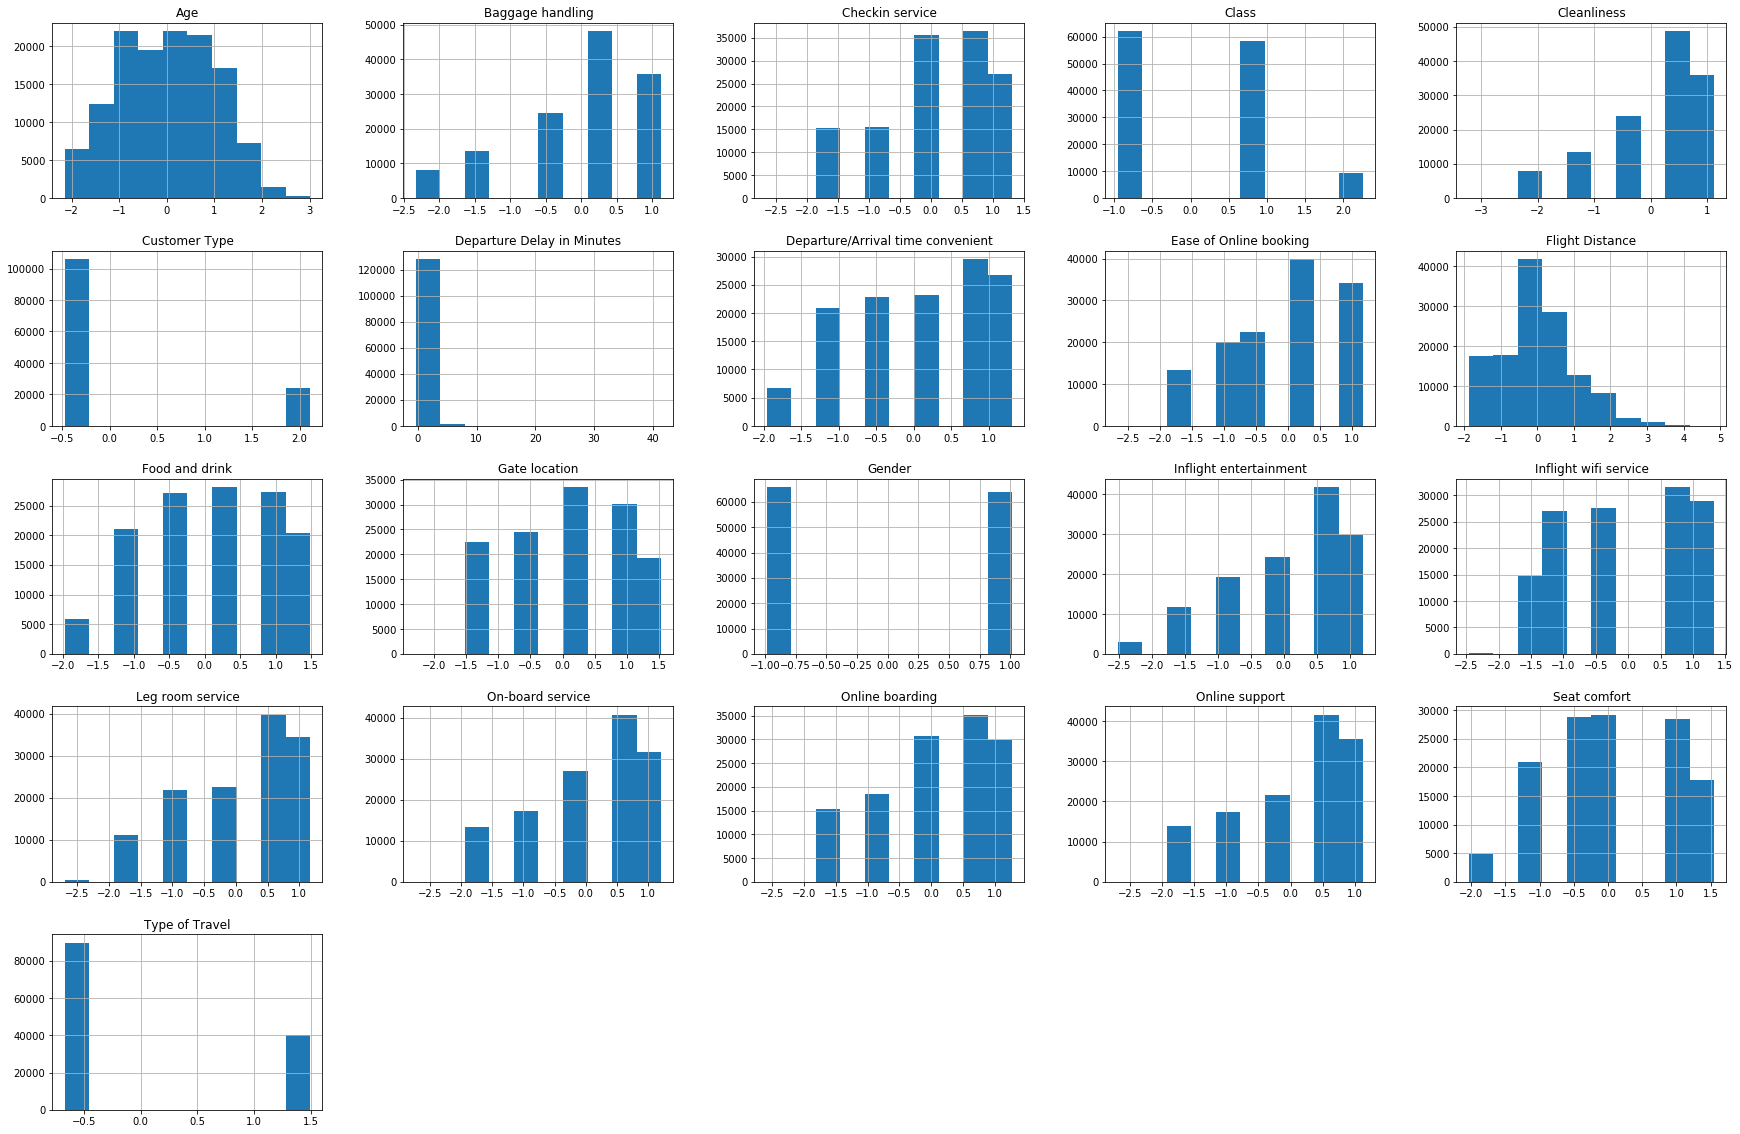

In [24]:
# Visualising the normalized features of the data
Normalised_dataframe = pd.DataFrame(X, columns=df.columns[1:])
Normalised_dataframe.hist(figsize = (30,20))

### Train/Test Split

In [25]:
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.15)

# Section 2: Model Creation and Performance Measures

In [26]:
# Creating a function to train and test on different models
def train_and_test(X_train, X_test, y_train, y_test, classifier):
    
    if classifier == 'decision_tree':
        clf = DecisionTreeClassifier(random_state=42)
    elif classifier == 'svm':
        clf = SVC(random_state=42)
    elif classifier == 'random_forest':
        clf = RandomForestClassifier(random_state=42)
    elif classifier == 'gradient_boosting':
        clf = GradientBoostingClassifier(random_state=42)
    elif classifier == 'logistic_regression':
        clf = LogisticRegression(random_state=42)
    elif classifier == 'knn':
        clf = KNeighborsClassifier()
    elif classifier == 'mlp':
        clf = MLPClassifier(random_state=42, max_iter=200, learning_rate_init=1e-2)
        
    # Calculating the time required to train the model
    start = timeit.default_timer()      
    clf.fit(X_train, y_train)
    stop = timeit.default_timer()
    y_pred = clf.predict(X_test)
    num_correct = sum(y_pred==y_test)
    time = stop-start
    if time >= 60 and time < 120:
        print(f"Time required: {(time)//60} minute {(time)%60} seconds")
    elif time >= 60:
        print(f"Time required: {(time)//60} minutes {(time)%60} seconds")
    else:  
        print(f"Time required: {time} seconds")
    print('Accuracy: ', num_correct/len(y_pred))
    
    return clf, y_pred

In [27]:
# Creating a function to calculate the performance measures of a model
def performance_measures(clf, y_pred, X_test, y_test):
    
    # Computing the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Computing the precision and recall 
    precision = precision_score(y_test, y_pred)
    print("Precision score: ", precision)
    recall = recall_score(y_test, y_pred)
    print("Recall score: ", recall)
    
    # Computing the specificity 
    specificity = conf_matrix[0][0]/(conf_matrix[0][0]+conf_matrix[0][1])
    print("Specificity value: ", specificity)
    
    # Computing the f1-score
    f1_score = (2*precision*recall)/(precision+recall)
    print("F1 score: ", f1_score)
    
    # Plotting the confusion matrix 
    plot_confusion_matrix(clf, X_test, y_test, cmap='Blues')

### Logistic Regression Classifier

Time required: 0.22652629999998908 seconds
Accuracy:  0.8366697464326045
Precision score:  0.8517170586039567
Recall score:  0.8513992537313433
Specificity value:  0.818648710340105
F1 score:  0.8515581265161412


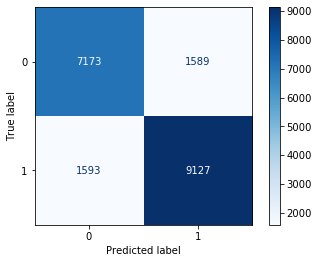

In [28]:
# Training and testing on Logistic Regression Classifier
lr_clf, y_pred = train_and_test(X_train, X_test, y_train, y_test, classifier='logistic_regression')
performance_measures(lr_clf, y_pred, X_test, y_test)

### Gradient Boosting Classifier

Time required: 22.249704800000018 seconds
Accuracy:  0.9263422646545529
Precision score:  0.9312587087784486
Recall score:  0.9351679104477612
Specificity value:  0.9155443962565625
F1 score:  0.933209215731906


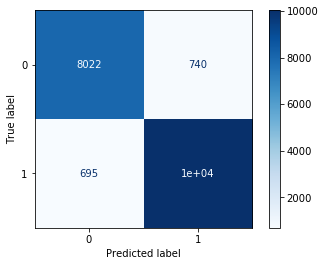

In [29]:
# Training and testing on Gradient Boosting Classifier
gb_clf, y_pred = train_and_test(X_train, X_test, y_train, y_test, classifier='gradient_boosting')
performance_measures(gb_clf, y_pred, X_test, y_test)

### K-Nearest Neighbors Classifier

Time required: 0.015484099999980572 seconds
Accuracy:  0.9270608767067037
Precision score:  0.9502275588263774
Recall score:  0.9153917910447761
Specificity value:  0.9413375941565852
F1 score:  0.9324844395875896


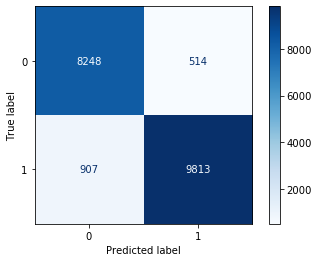

In [30]:
# Training and testing on K-Nearest Neighbors Classifier
knn_clf, y_pred = train_and_test(X_train, X_test, y_train, y_test, classifier='knn')
performance_measures(knn_clf, y_pred, X_test, y_test)

### Decision Tree Classifier

Time required: 0.7258555999999885 seconds
Accuracy:  0.9426650241248332
Precision score:  0.9455321518047695
Recall score:  0.9505597014925373
Specificity value:  0.9330061629764894
F1 score:  0.9480392612922733


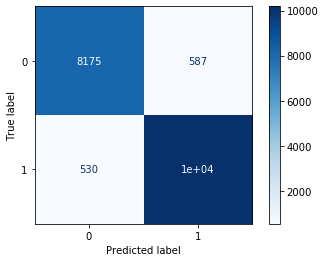

In [31]:
# Training and testing on Decision Tree Classifier
dt_clf, y_pred = train_and_test(X_train, X_test, y_train, y_test, classifier='decision_tree')
performance_measures(dt_clf, y_pred, X_test, y_test)

### Support Vector Machines Classifier

Time required: 4.0 minutes 8.249656200000004 seconds
Accuracy:  0.950159121240119
Precision score:  0.9569700946845411
Recall score:  0.9522388059701492
Specificity value:  0.9476146998402192
F1 score:  0.9545985879272455


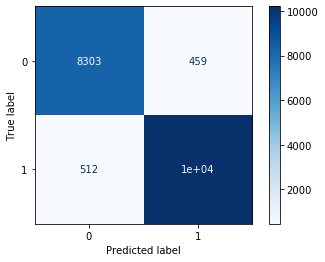

In [32]:
# Training and testing on Support Vector Machines (SVM) Classifier
svm_clf, y_pred = train_and_test(X_train, X_test, y_train, y_test, classifier='svm')
performance_measures(svm_clf, y_pred, X_test, y_test)

### Multi-layer Perceptron Classifier

Time required: 1.0 minute 2.9013821999999436 seconds
Accuracy:  0.9552407350374705
Precision score:  0.9570261741228885
Recall score:  0.9618470149253732
Specificity value:  0.9471581830632275
F1 score:  0.9594305387550015


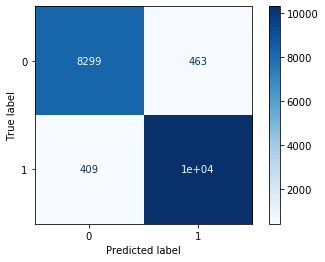

In [33]:
# Training and testing on Multi-layer Perceptron (MLP) classifier 
mlp_clf, y_pred = train_and_test(X_train, X_test, y_train, y_test, classifier='mlp')
performance_measures(mlp_clf, y_pred, X_test, y_test)

### Random Forest Classifier

Time required: 11.768722199999957 seconds
Accuracy:  0.9621188789651987
Precision score:  0.9751523229246002
Recall score:  0.9555037313432836
Specificity value:  0.970212280301301
F1 score:  0.9652280437240859


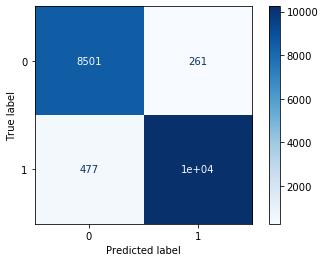

In [34]:
# Training and testing on Random Forest Classifier
rf_clf, y_pred = train_and_test(X_train, X_test, y_train, y_test, classifier='random_forest')
performance_measures(rf_clf, y_pred, X_test, y_test)

### Baseline Classifier
The baseline classifier only predicts "dissatisfied" for all exmaples.

In [35]:
# Building the baseline model that always predicts 'dissatisfied'
class Dissatisfied(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
dissatisfied = Dissatisfied()
val_scores = cross_val_score(dissatisfied, X, y, cv=10, scoring='accuracy')
print("Accuracy of the baseline model: ", val_scores.sum()/val_scores.shape[0])

Accuracy of the baseline model:  0.45267169695103177


<ul>
<li> We can see that our baseline model that only predicts 'dissatisfied' performs considerably worse than our selected models</li>
</ul>

##### Remarks about models:
<ol>
<li> The best performing model for this data is the Random Forest Classifier with an accuracy of 96.2% </li>
<li> The second best model is the MLP classifier with an accuracy of 95.5% </li>
<li> The logistic Regression classifier performs the worst compared to the other 6 models used </li>
</ol>

# Section 3: Feature Importance Scores

In [38]:
# Calculating the importance scores for the features
z = df.loc[:, df.columns != 'satisfaction']
feature_importance_scores_rf = pd.Series(rf_clf.feature_importances_, index=z.columns, name='Random Tree').sort_values(ascending=False)
print(feature_importance_scores_rf)

Inflight entertainment               0.193804
Seat comfort                         0.134302
Ease of Online booking               0.073902
Online support                       0.070391
Leg room service                     0.045158
Customer Type                        0.044026
Food and drink                       0.039465
On-board service                     0.037793
Class                                0.037471
Flight Distance                      0.036285
Online boarding                      0.036232
Age                                  0.032843
Gender                               0.031321
Type of Travel                       0.029423
Baggage handling                     0.027052
Checkin service                      0.026777
Cleanliness                          0.024904
Departure/Arrival time convenient    0.023411
Gate location                        0.021262
Departure Delay in Minutes           0.017887
Inflight wifi service                0.016290
Name: Random Tree, dtype: float64


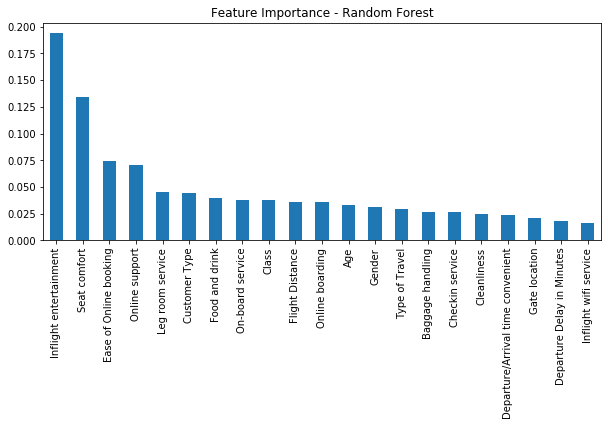

In [39]:
# Plotting the feature scores from random forest
feature_importance_scores_rf.plot(kind='bar', title='Feature Importance - Random Forest', figsize=(10,4))
plt.show()

In [40]:
# Calculating the importance scores of the features from Decision Tree
z = df.loc[:, df.columns != 'satisfaction']
feature_importance_scores_dt = pd.Series(dt_clf.feature_importances_, index=z.columns, name='Decision Tree').sort_values(ascending=False)
print(feature_importance_scores_dt)

Inflight entertainment               0.388215
Seat comfort                         0.186375
Ease of Online booking               0.063973
Customer Type                        0.043036
Type of Travel                       0.035808
Flight Distance                      0.031560
Gate location                        0.027397
Age                                  0.025280
Class                                0.022514
Departure/Arrival time convenient    0.020841
Online support                       0.019542
Baggage handling                     0.018742
Checkin service                      0.018285
Leg room service                     0.017353
Gender                               0.017167
Departure Delay in Minutes           0.015739
Cleanliness                          0.014567
On-board service                     0.010110
Online boarding                      0.009379
Food and drink                       0.008572
Inflight wifi service                0.005544
Name: Decision Tree, dtype: float6

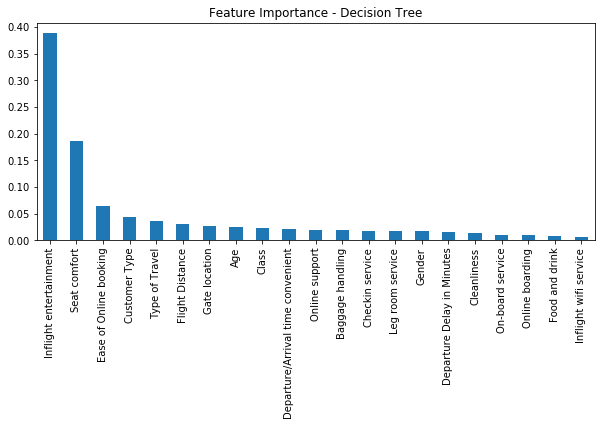

In [41]:
# Plotting the feature scores from Decision Tree
feature_importance_scores_dt.plot(kind='bar', title='Feature Importance - Decision Tree', figsize=(10,4))
plt.show()

In [42]:
# Merging the feature scores from Random Forest and Decision Tree
df_Feature_scores = pd.merge(feature_importance_scores_rf, feature_importance_scores_dt,right_index = True,left_index = True)
print(df_Feature_scores)

                                   Random Tree  Decision Tree
Inflight entertainment                0.193804       0.388215
Seat comfort                          0.134302       0.186375
Ease of Online booking                0.073902       0.063973
Online support                        0.070391       0.019542
Leg room service                      0.045158       0.017353
Customer Type                         0.044026       0.043036
Food and drink                        0.039465       0.008572
On-board service                      0.037793       0.010110
Class                                 0.037471       0.022514
Flight Distance                       0.036285       0.031560
Online boarding                       0.036232       0.009379
Age                                   0.032843       0.025280
Gender                                0.031321       0.017167
Type of Travel                        0.029423       0.035808
Baggage handling                      0.027052       0.018742
Checkin 

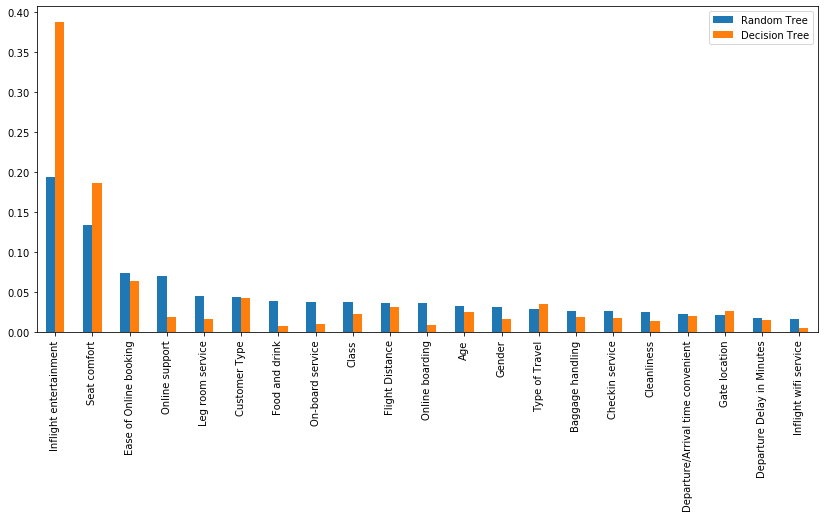

In [43]:
# Plotting the feature scores from Random Forest and Decision Tree
df_Feature_scores.plot(kind='bar', figsize = (14,6))
plt.show()

##### From the above feature importance calculations we can conclude:
<ol>
<li> Inflight entertainment has the biggest impact on customer satisfaction. </li> 
<li> Seat comfort comes in at second. </li> 
<li> Ease of online booking and support also has an impact on customer satisfaction. </li>
<li> Departure delay and inflight wifi service have the least effect on customer satisfaction. </li>
<li> The airline has to maintain the quality of top important features to maximize customer satisfaction. </li>
</ol>

# Extra: Evaluating Performance Measures of the Models on Uncleaned Data
Training and testing the models on unscaled and unstandardized data to observe the impact of scaling and standardization on the performance of the models. 

In [45]:
df_uncleaned = df.loc[:, df.columns != 'satisfaction']
X_train_uncleaned, X_test_uncleaned, y_train_uncleaned, y_test_uncleaned = train_test_split(df_uncleaned, y, random_state=42, test_size = 0.15)

### Logistic Regression on Uncleaned Data

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Time required: 1.3260285999999724 seconds
Accuracy:  0.7903192690688841
Precision score:  0.7826049919073175
Recall score:  0.8569962686567164
Specificity value:  0.7087422962793882
F1 score:  0.8181130059219022


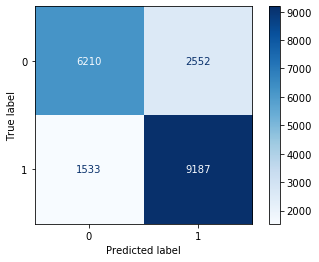

In [46]:
# Training and testing of Logistic Regression Classifier on uncleaned data
lr_clf_uncleaned, y_pred_uncleaned = train_and_test(X_train_uncleaned, X_test_uncleaned, y_train_uncleaned, y_test_uncleaned, classifier='logistic_regression')
performance_measures(lr_clf_uncleaned, y_pred_uncleaned, X_test_uncleaned, y_test_uncleaned)

### Random Forest on Uncleaned Data

Time required: 11.77582039999993 seconds
Accuracy:  0.9623241966943845
Precision score:  0.9751617814998097
Recall score:  0.9558768656716418
Specificity value:  0.970212280301301
F1 score:  0.9654230261918221


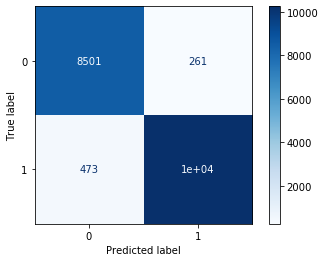

In [47]:
# Training and testing of Random Forest Classifier on uncleaned data
rf_clf_uncleaned, y_pred_uncleaned = train_and_test(X_train_uncleaned, X_test_uncleaned, y_train_uncleaned, y_test_uncleaned, classifier='random_forest')
performance_measures(rf_clf_uncleaned, y_pred_uncleaned, X_test_uncleaned, y_test_uncleaned)

### MLP on Uncleaned Data

Time required: 48.62424060000012 seconds
Accuracy:  0.8852787188173699
Precision score:  0.877345904118118
Recall score:  0.9201492537313433
Specificity value:  0.8426158411321616
F1 score:  0.8982379456358421


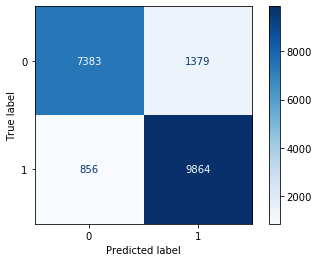

In [48]:
# Training and testing of MLP Classifier on uncleaned data
mlp_clf_uncleaned, y_pred_uncleaned = train_and_test(X_train_uncleaned, X_test_uncleaned, y_train_uncleaned, y_test_uncleaned, classifier='mlp')
performance_measures(mlp_clf_uncleaned, y_pred_uncleaned, X_test_uncleaned, y_test_uncleaned)

### Decision Tree on Uncleaned Data

Time required: 0.7053178000001026 seconds
Accuracy:  0.9425110358279437
Precision score:  0.9453516422341808
Recall score:  0.9504664179104477
Specificity value:  0.9327779045879936
F1 score:  0.9479021304307377


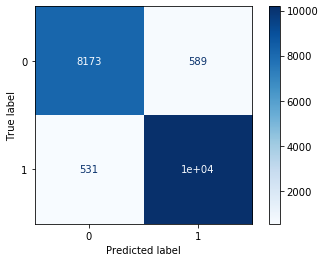

In [49]:
# Training and testing of Decision Tree Classifier on uncleaned data
dt_clf_uncleaned, y_pred_uncleaned = train_and_test(X_train_uncleaned, X_test_uncleaned, y_train_uncleaned, y_test_uncleaned, classifier='decision_tree')
performance_measures(dt_clf_uncleaned, y_pred_uncleaned, X_test_uncleaned, y_test_uncleaned)

### Gradient Boosting on Uncleaned Data

Time required: 16.295553100000006 seconds
Accuracy:  0.9263422646545529
Precision score:  0.9312587087784486
Recall score:  0.9351679104477612
Specificity value:  0.9155443962565625
F1 score:  0.933209215731906


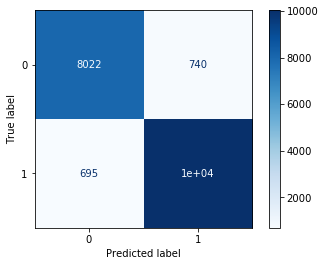

In [50]:
# Training and testing of Gradient Boosting Classifier on uncleaned data
gb_clf_uncleaned, y_pred_uncleaned = train_and_test(X_train_uncleaned, X_test_uncleaned, y_train_uncleaned, y_test_uncleaned, classifier='gradient_boosting')
performance_measures(gb_clf_uncleaned, y_pred_uncleaned, X_test_uncleaned, y_test_uncleaned)

### KNN on Uncleaned Data

Time required: 0.015981499999952575 seconds
Accuracy:  0.7268247613181398
Precision score:  0.750556999628667
Recall score:  0.7541977611940298
Specificity value:  0.6933348550559233
F1 score:  0.7523729759910665


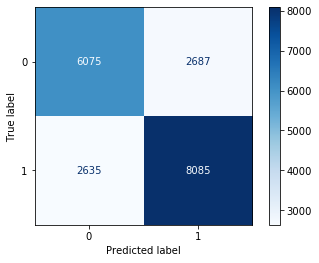

In [51]:
# Training and testing of KNN Classifier on uncleaned data
knn_clf_uncleaned, y_pred_uncleaned = train_and_test(X_train_uncleaned, X_test_uncleaned, y_train_uncleaned, y_test_uncleaned, classifier='knn')
performance_measures(knn_clf_uncleaned, y_pred_uncleaned, X_test_uncleaned, y_test_uncleaned)

### SVM on Uncleaned Data

Time required: 17.0 minutes 44.11857219999979 seconds
Accuracy:  0.6112308797864696
Precision score:  0.6760689500783523
Recall score:  0.5634328358208955
Specificity value:  0.6697101118466103
F1 score:  0.6146331535565279


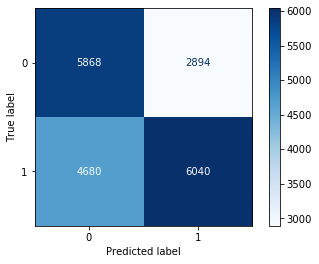

In [52]:
# Training and testing of SVM Classifier on uncleaned data
svm_clf_uncleaned, y_pred_uncleaned = train_and_test(X_train_uncleaned, X_test_uncleaned, y_train_uncleaned, y_test_uncleaned, classifier='svm')
performance_measures(svm_clf_uncleaned, y_pred_uncleaned, X_test_uncleaned, y_test_uncleaned)

 From this analysis we can see that the impact of cleaned data on the performance of the models is crucial. 

# Link to the PowerPoint slides: 
https://drive.google.com/file/d/1aLVZA63BMfm-hmYZ9an5w5qYTIXiKqOt/view?usp=sharing